## Before submitting:

1. Fill your name and studet id number below:

2. Please submit only the `*.pdf` file.

3. Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. 


In [1]:
STUDENT_NAME = "Dennis Grinwald"
STUDENT_ID = "406516"

# Exercise Sheet 2: Bioinformatics

This second exercise sheet is about two common approaches in BCI for processing and analysing of the EEG (electroencephalogram) data. 

## 1. Biology (25 P)

__1.1__ Please describe the human genome. __(10 P)__

### Answer 1.1

The human genome comprises the complete information needed to build and maintain(e.g. through proteins) an organism as we know it. 

More specifically it comprises the complete set of DNA, which itself consists of pairs(A-T, and C-G, correspondingly) of the 4 bases:
1. A = Adenine
2. C = Cytosine
3. T = Thymine
4. G = Guanine ,

which together built a double-helix structure.
The entire DNA resides in the nucleus of every cell.

The total number of bases contained in the human genome is estimated at 3.2 billion in total.

__1.2__ Please describe the process of the protein biosynthesis. __(15 P)__  

### Answer 1.2

The function of the protein biosynthesis is to decode the information about certain genes in the DNA, that serve as instructions for building up amino acids and further proteins.

In particular the protein biosynthesis comprises the following major steps:

1. Transcription Step:
During this step the double helix(DNA) is unwound, and, using one strand of the double helix, a complementary messenger-RNA(mRNA) strand is built(Transcription). Specific combinations of bases(promoter regions, e.g. TATA-Box) signalize the start, and a other regions(stop-codon) signalize the end of the Transcription section.

2. Splice Step:
The transcripted mRNA consists of exons and introns, which are again just specific base combinations. Whereas the Introns are actually used for the future translation step, exons are more like placeholders that are useless for that particular amino acid creation. During the splicing steps these exons are cut out, and the introns are stacked together.

3. Translation Step:
During this step the sliced, and stacked m-RNA strands leave the nucleus of the cell and the get translated into amino acids, which are attached together to build a protein. The strand, which comes out of the Translation step is called tRNA.

## 2. Machine Learning (25 P)

__2.1__ Assume that we have a binary classification problem, where a sample belong to the either the +1 class if there exist a splice site in the sample or otherwise to the -1 class. Now, we have given some DNA sequences of length $L$ with labels, $x_i\in \{A,C,G,T\}^L, \ y_i \in \{-1,1\}$.
Please describe an arbitraty process of how you get from your given data to your final machine learning algorithm, that can classify between the two classes. __(15 P)__

### Answer 2.1
Steps to get from data to machine learning algorithm:

1. Preprocess the data:
On the hand this includes removing invalid values, e.g: None-values, invalid symbols etc., and on the other hand this means representing the data in a format, that is useable by Machine Learning Algorithms. For example: If our dataset comprises of string data, we would want to transform it to a numeric representation. In our DNA-sequence example we could for example one-hot encode it, to get a numerical representation of the training data


2. Train the Classifier:
Use the preprocessed training data and the according label, to train a learning algorithm, e.g. SVM. During training the classifier learns to make use of patterns in the input data, that make it be classifiable according to it's class. In our DNA-string sequence example this could be a certain combination of consecutive bases.


3. Classify new data
Use the trained classifier to classify the new "arriving data". Here it's imported to apply the same operations as in step 1 to the data, before classifying it.

__2.2__ Please explain why the explanation of a trained classifier is often mandatory. __(10 P)__

### Answer 2.2
The explanation of a trained classifier is important in order to screen on what parameters the model has chosen to classify a certain data sample for a specific class. In an extreme case, where there is a lot of noisy input data, it could be the case that the classifier learns all the noise. This would lead to bad prediction performance on new incoming data.

I a sensitive scenarion, e.g: an autonomous vehicle on the streets this could result to a hazardous situation, where the classifier predicts a certain situation wrongly, because of it's "noisy" learned representation of the world, induced through the training data.

## 2. Weighted Degree Kernel (15 P)

### The weighted-degree kernel, defined as
\begin{equation}\label{wd-kernel}
k(x,x')=\sum\limits_{l=1}^{k}\beta_l\sum\limits_{j=1}^{L-l+1}\mathbb{I}\{x[j]^l=x'[j]^l\}\thinspace,
\end{equation}
breaks two DNA sequences $x$ and $x'$ of length $L$ into all possible subsequences of length $l\leq L$ starting at position $j$, denoted by $x[j]^l$ and $x'[j]^l$, respectively, where $\beta_l:=2\frac{d-l+1}{d(d+1)}$ is the weight of the $l$-mer length.
The kernel value $k(x,x')$ is then obtained by counting the number of matching subsequences, the so-called \emph{positional oligomers} (POs), when traversing the positions $j=1,\ldots,L-l+1$. 

__2.1__ Please compute the kernel value for the following two DNA sequences for $k=4$. __(15 P)__ 

<h3 align="center"> $x = AACTGGTATACTTTTCGATTCCATCAG$</h3>
<h3 align="center"> $x'= ACCTTTTATACGGTTACTTGCCAGAAT$</h3>

In [17]:
import numpy as np
from scipy.spatial.distance import cdist,pdist,squareform
import time

In [18]:
# compute betas, usually only needed to be computed once
def computeBetas(degree):
    betas = [(2*(degree+1-k) / (degree*(degree+1))) for k in range(1,degree+1)] 
    
    return betas

# Compute the weighted degree for 2 data points
# Make use of BLOCK-Implementation as introduced in lecture
def computeWDPair(x1,x2,betas,degree):
    
    diff = np.array(x1==x2)*1
    idx = np.where(diff!=0)[0]
    slices = np.split(diff[idx],np.where(np.diff(idx)!=1)[0]+1)
    slices = sorted(slices,key=len)
    
    summ = 0
    for d in range(1,degree+1):
        
        beta = betas[d-1]
        
        for s in slices:
            s_len = s.shape[0] 
            if s_len >= d:
                summ += beta * (1 + s_len-d)
                
    return summ

In [19]:
x1 = np.array([char for char in "AACTGGTATACTTTTCGATTCCATCAG"])
x2 = np.array([char for char in "ACCTTTTATACGGTTACTTGCCAGAAT"])

k = 4

train_seq_length = x1.shape[0]
betas = computeBetas(k)
weightedDegreeSumm = computeWDPair(x1,x2,betas,k)

print("Kernel Value for the given sequences is: {}".format(weightedDegreeSumm))

Kernel Value for the given sequences is: 9.399999999999997


## 3. Perform Kernel Computation and Classification (60 P)

__3.1__ Load the DNA splice data the folder splice_data. __(5 P)__

Xtrain = 
Ytrain =
Xtest =
Ytest =

In [20]:
### IMPORT LIBRARIES ###
import matplotlib.pyplot as plt

In [21]:
Xtrain = np.loadtxt("/home/dg/Dropbox/TUB/SoSe19/ML_SC/hw2/splice-train-data.txt",dtype=str)
Ytrain = np.loadtxt("/home/dg/Dropbox/TUB/SoSe19/ML_SC/hw2/splice-train-label.txt")
Xtest = np.loadtxt("/home/dg/Dropbox/TUB/SoSe19/ML_SC/hw2/splice-test-data.txt",dtype=str) 
Ytest = np.loadtxt("/home/dg/Dropbox/TUB/SoSe19/ML_SC/hw2/splice-test-label.txt") 

__3.2__ Compute the length of the DNA sequences in the train and test set and the number of positive and negative samples in the training data. Note that a DNA sequence only consists of nucleotids $\{A,C,G,T\}$. __(5 P)__

Basic Data stats:
No. training data samples: 1000
No. training data labels: 1000
No. test data samples: 2175
No. test data labels: 2175

Training sample sequence length = 60
Test sample sequence length = 60


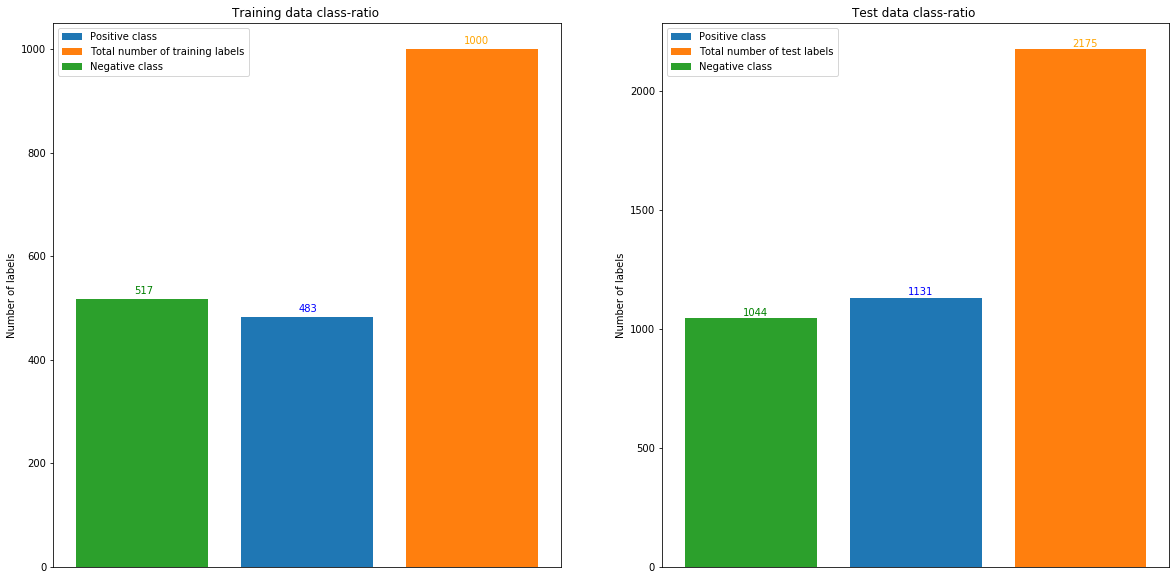

In [22]:
NumTrainSamples = Xtrain.shape[0]
NumTrainLabels = Ytrain.shape[0]
NumTestSamples = Xtest.shape[0]
NumTestLabels = Ytest.shape[0]

train_seq_length = len(Xtrain[0])
test_seq_length = len(Xtest[0])

pos_train_labels = Ytrain[Ytrain==1].shape[0]
pos_test_labels = Ytest[Ytest==-1].shape[0]

print("Basic Data stats:")
print("=================")
print(f"No. training data samples: {NumTrainSamples}")
print(f"No. training data labels: {NumTrainLabels}")
print(f"No. test data samples: {NumTestSamples}")
print(f"No. test data labels: {NumTestLabels}\n")
print(f"Training sample sequence length = {train_seq_length}")
print(f"Test sample sequence length = {test_seq_length}")


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.bar(0,pos_train_labels,label="Positive class")
ax1.bar(1,NumTrainLabels,label="Total number of training labels")
ax1.bar(-1,NumTrainLabels-pos_train_labels,label="Negative class")
ax1.text(-1.05,NumTrainLabels-pos_train_labels + 10,str(NumTrainLabels-pos_train_labels),color="g")
ax1.text(-0.05,pos_train_labels + 10,str(pos_train_labels),color="b")
ax1.text(0.95,NumTrainLabels + 10,str(NumTrainLabels),color="orange")
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("Number of labels")
ax1.set_title("Training data class-ratio ")
ax1.legend()

ax2.bar(0,pos_test_labels,label="Positive class")
ax2.bar(1,NumTestLabels,label="Total number of test labels")
ax2.bar(-1,NumTestLabels-pos_test_labels,label="Negative class")

ax2.text(-1.05,NumTestLabels-pos_test_labels + 10,str(NumTestLabels-pos_test_labels),color="g")
ax2.text(-0.05,pos_test_labels + 10,str(pos_test_labels),color="b")
ax2.text(0.95,NumTestLabels + 10,str(NumTestLabels),color="orange")

ax2.get_xaxis().set_visible(False)
ax2.set_ylabel("Number of labels")
ax2.set_title("Test data class-ratio ")
ax2.legend()

plt.show()

__3.3__ Implement the weighted degree kernel function that computes the train and test kernel matrices. Note that you should find an efficient way for the implementation - for loops are not efficient here!   __(20 P)__

In [26]:
# Transform data matrices to vectors
Xtrain = np.array([list(row) for row in Xtrain])
Xtest = np.array([list(row) for row in Xtest])

In [27]:
def weighted_degree_kernel_matrix(Xtrain,Xtest,degree):
    
    # compute betas once
    betas = computeBetas(degree)
    
    # Generally faster than looping through the single rows
    Ktrain = squareform(pdist(Xtrain, metric=lambda r1,r2: computeWDPair(r1,r2,betas,degree)))
    Ktest = cdist(Xtest, Xtrain, metric=lambda r1,r2: computeWDPair(r1,r2,betas,degree))
    
    # Fill diagonal of Ktrain - squareform(pdist(Xtrain)) returns 0's as diagonal values
    for ix1,x1 in enumerate(Xtrain):
        res = computeWDPair(x1,x1,betas,degree)
        Ktrain[ix1][ix1] = res
                
    
    return Ktrain,Ktest

__3.4__ Train a Support Vector Machine (SVM) by using the weighted degree kernel matrix from above. __(10 P)__

In [28]:
from sklearn.metrics import balanced_accuracy_score
from sklearn import svm

max_degree = 4
total = 0
for i in range(max_degree):
    
    start = time.time()
    Ktrain, Ktest = weighted_degree_kernel_matrix(Xtrain, Xtest, i+1)
    
    # Fit the model on the training data
    model = svm.SVC(kernel="precomputed")
    model = model.fit(Ktrain,Ytrain)
    
    # Predictions using the train data
    Ttrain = model.predict(Ktrain)
    # Predictions using the test data
    Ttest = model.predict(Ktest)
    
    end = time.time()-start
    total += end
    
    print("Computation of degree: {} took: {}s".format(i,end))
        
    print('degree: %d training accuracy: %.3f test accuracy: %.3f'%(i+1,balanced_accuracy_score(Ytrain,Ttrain),balanced_accuracy_score(Ytest,Ttest)))

print("Total time: {}".format(total))

Computation of degree: 0 took: 94.14272689819336s
degree: 1 training accuracy: 0.994 test accuracy: 0.916
Computation of degree: 1 took: 99.34064245223999s
degree: 2 training accuracy: 1.000 test accuracy: 0.939
Computation of degree: 2 took: 101.29955911636353s
degree: 3 training accuracy: 1.000 test accuracy: 0.952
Computation of degree: 3 took: 109.89188647270203s
degree: 4 training accuracy: 1.000 test accuracy: 0.961
Total time: 404.6748149394989


__3.5__ Implement a function for the one-hot encoding of a DNA sequence. __(10 P)__

In [29]:
def oneHotEnc(X):
    # BUILD THE ONE_HOT_ENCODER_DICTIONARY
    one_hot_dict = dict()
    for V,K in enumerate(np.unique(Xtest)):
        tmp_one_hot_vec = np.zeros(len(np.unique(Xtest)))
        tmp_one_hot_vec[V] = 1
        one_hot_dict[K] = tmp_one_hot_vec
    
    # ENCODE THE ARRAY
    
    # FOR SINGLE VECTOR INPUT
    try:
        XoH = np.ravel([one_hot_dict[e] for e in X])
        
    # FOR MATRIX INPUT
    except:
        XoH = np.vstack( [np.ravel([ np.hstack( one_hot_dict[e]  ) for e in r  ])  for r in X] )
    
    return XoH

__3.6__ Train a SVM with an RBF kernel using the oneHotEnc of the DNA data. __(10 P)__

In [30]:
from sklearn import svm
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import balanced_accuracy_score

# PREPROCESSING OF THE DATA
Xtrain = oneHotEnc(Xtrain)
Xtest = oneHotEnc(Xtest)

Ktrain = rbf_kernel(Xtrain, Xtrain)
Ktest = rbf_kernel(Xtest,Xtrain)

model = svm.SVC(kernel="precomputed")
model = model.fit(Ktrain,Ytrain)

Ttrain = model.predict(Ktrain)
Ttest = model.predict(Ktest)

print('one-hot encoding: training accuracy: %.3f test accuracy: %.3f'%(balanced_accuracy_score(Ytrain,Ttrain),balanced_accuracy_score(Ytest,Ttest)))

one-hot encoding: training accuracy: 0.952 test accuracy: 0.942
